In [1]:
import os
main_path = os.path.abspath(os.path.join(os.path.dirname("./Untitled.ipynb"), '..'))
import sys


sys.path.insert(0, main_path)

from src.methodA.transformer import CountVectorizer, get_full_alphabet, transformer_mp_tuples
from src.methodA.cross_validation import cv_pca, CVParamFinder
from src.methodA.classify import cv_classify, train_test_classify
from src.utils import read_numpy_dataset, read_file_regular_dataset
# from src.methodA.class_vectors import 

import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
from sklearn.metrics import balanced_accuracy_score

In [2]:
ucr_data = os.path.join(main_path, "data", "UCRArchive_2018")
ucr_data

'/home/frmunoz/Documents/tesis/data/UCRArchive_2018'

# UCR dataset tests

80


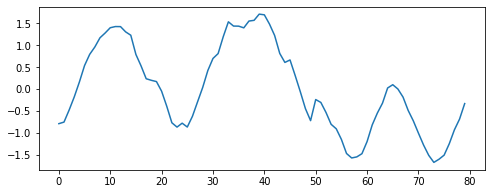

In [5]:
# key = "MiddlePhalanxTW"
key = "DistalPhalanxOutlineAgeGroup"
# key = "FaceFour"
train_file = os.path.join(ucr_data, key, key + "_TRAIN.tsv")
test_file = os.path.join(ucr_data, key, key + "_TEST.tsv")
d_train, t_train, l_train, m = read_file_regular_dataset(train_file)
d_test, t_test, l_test, m = read_file_regular_dataset(test_file)
plt.figure(figsize=(8, 3))
i = 1
print(len(d_train[i]))
plt.plot(t_train[i], d_train[i])

In [9]:
# find best params by cross-validation leave-one-out
cv_finder = CVParamFinder(max_n_lengths=6, max_n_windows=40)
class_method = "centroid"
cv_method = "kfold"
n_splits = 10

# with_mean=True
# n_components = 3
# dist_method = "euclidean"
# repr_method="bopf"
# use_pca = False
# scale = False

with_mean=True
n_components = 20
dist_method = "cosine"
repr_method="tf_idf"
use_pca = False
scale = False


cv_finder.cv_first_step(d_train, t_train, l_train, special_character=False, 
                        use_pca=use_pca, class_method=class_method, scale=scale, cv_method=cv_method,
                       n_splits=n_splits, with_mean=with_mean, n_components=n_components,
                                                 dist_method=dist_method, repr_method=repr_method)

cv_finder.cv_second_step(d_train, t_train, l_train, special_character=False, 
                        use_pca=use_pca, class_method=class_method, scale=scale, cv_method=cv_method,
                       n_splits=n_splits, with_mean=with_mean, n_components=n_components,
                                                 dist_method=dist_method, repr_method=repr_method)

computing count vectorizers for window = [39.5], word_length = [1 2 3 4 5 6] 

MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-146'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [39.5, 1] on worker 'Process-146'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-147'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [39.5, 2] on worker 'Process-147'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-148'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [39.5, 3] on worker 'Process-148'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-149'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-150'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [39.5, 4] on worker 'Process-149'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [39.5, 5] on worker 'Process-150'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-151'
MethodA.CountVectorizer.INFO    : computing BagOfP

worker 'Process-153' DONE
worker 'Process-152' DONE
worker 'Process-146' DONE
worker 'Process-147' DONE
worker 'Process-148' DONE
worker 'Process-149' DONE
worker 'Process-150' DONE
worker 'Process-151' DONE
DONE
computing balanced accuracy for Cross-validation using 8 process
Multiprocessing CV: |||||| [DONE]
first cv -> best b_acc: 0.796 for pair [39.5, 6] (4096 features) (time: 10.189 sec)
computing count vectorizers for window = [12.   13.72 15.44 17.15 18.87 20.59 22.31 24.03 25.74 27.46 29.18 30.9
 32.62 34.33 36.05 37.77 39.49 39.5  41.21 42.92 44.64 46.36 48.08 49.79
 51.51 53.23 54.95 56.67 58.38 60.1  61.82 63.54 65.26 66.97 68.69 70.41
 72.13 73.85 75.56 77.28 79.  ], word_length = [6] 

MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-164'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [12.0, 6] on worker 'Process-164'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-165'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-166'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [15.44, 6] on worker 'Process-166'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [13.72, 6] on worker 'Process-165'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-167'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [17.15, 6] on worker 'Process-167'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-168'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-169'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [18.87, 6] on worker 'Process-168'
MethodA.CountVectorizer.INFO    : computing Ba

worker 'Process-167' DONE
worker 'Process-166' DONE
worker 'Process-164' DONE
worker 'Process-165' DONE
worker 'Process-168' DONE
worker 'Process-170' DONE
worker 'Process-171' DONE
worker 'Process-169' DONE
DONE
computing balanced accuracy for Cross-validation using 8 process
Multiprocessing CV: ||||||||||||||||||||||||||||||||||||||||| [DONE]
second cv -> best b_acc: 0.835 for pair [32.6, 6] (4096 features) (time: 99.758 sec)


In [7]:
with_mean=True
n_components = 20
dist_method = "cosine"
repr_method="tf_idf"
use_pca = False
scale = False


cv_finder.cv_first_step(d_train, t_train, l_train, special_character=False, 
                        use_pca=use_pca, class_method=class_method, scale=scale, cv_method=cv_method,
                       n_splits=n_splits, with_mean=with_mean, n_components=n_components,
                                                 dist_method=dist_method, repr_method=repr_method)

cv_finder.cv_second_step(d_train, t_train, l_train, special_character=False, 
                        use_pca=use_pca, class_method=class_method, scale=scale, cv_method=cv_method,
                       n_splits=n_splits, with_mean=with_mean, n_components=n_components,
                                                 dist_method=dist_method, repr_method=repr_method)

computing count vectorizers for window = [39.5], word_length = [1 2 3 4 5 6] 

MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-74'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [39.5, 1] on worker 'Process-74'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-75'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [39.5, 2] on worker 'Process-75'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-76'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-77'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [39.5, 3] on worker 'Process-76'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-78'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [39.5, 4] on worker 'Process-77'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-80'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-79'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-

worker 'Process-79' DONEworker 'Process-80' DONE

MethodA.CountVectorizer.INFO    : computing BagOfPatter for [39.5, 6] on worker 'Process-81'




worker 'Process-74' DONE
worker 'Process-75' DONE
worker 'Process-77' DONE
worker 'Process-76' DONE
worker 'Process-78' DONE
worker 'Process-81' DONE
DONE
computing balanced accuracy for Cross-validation using 8 process
Multiprocessing CV: |||||| [DONE]
first cv -> best b_acc: 0.796 for pair [39.5, 6] (4096 features) (time: 11.958 sec)
computing count vectorizers for window = [12.   13.72 15.44 17.15 18.87 20.59 22.31 24.03 25.74 27.46 29.18 30.9
 32.62 34.33 36.05 37.77 39.49 39.5  41.21 42.92 44.64 46.36 48.08 49.79
 51.51 53.23 54.95 56.67 58.38 60.1  61.82 63.54 65.26 66.97 68.69 70.41
 72.13 73.85 75.56 77.28 79.  ], word_length = [6] 

MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-92'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [12.0, 6] on worker 'Process-92'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-93'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [13.72, 6] on worker 'Process-93'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-94'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [15.44, 6] on worker 'Process-94'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-95'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [17.15, 6] on worker 'Process-95'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-97'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-96'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [20.59, 6] on worker 'Process-96'
MethodA.CountVectorizer.INFO    : start countVectorizer o

worker 'Process-92' DONE
worker 'Process-95' DONE
worker 'Process-96' DONE
worker 'Process-99' DONE
worker 'Process-94' DONE
worker 'Process-97' DONE
worker 'Process-98' DONE
worker 'Process-93' DONE
DONE
computing balanced accuracy for Cross-validation using 8 process
Multiprocessing CV: |||||||||||||||||||||||||||||||||||||||| [DONE]
second cv -> best b_acc: 0.835 for pair [32.6, 6] (4096 features) (time: 93.274 sec)


In [8]:
# cv_finder = CVParamFinder(max_n_lengths=6, max_n_windows=40)
# class_method = "centroid"
# cv_method = "kfold"
# n_splits = 10
with_mean=True
n_components = 20
dist_method = "cosine"
repr_method="tf_idf"
use_pca = True
scale = False
class_method = None


cv_finder.cv_first_step(d_train, t_train, l_train, special_character=False, 
                        use_pca=use_pca, class_method=class_method, scale=scale, cv_method=cv_method,
                       n_splits=n_splits, with_mean=with_mean, n_components=n_components,
                                                 dist_method=dist_method, repr_method=repr_method)

cv_finder.cv_second_step(d_train, t_train, l_train, special_character=False, 
                        use_pca=use_pca, class_method=class_method, scale=scale, cv_method=cv_method,
                       n_splits=n_splits, with_mean=with_mean, n_components=n_components,
                                                 dist_method=dist_method, repr_method=repr_method)

computing count vectorizers for window = [39.5], word_length = [1 2 3 4 5 6] 

MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-110'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [39.5, 1] on worker 'Process-110'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-111'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [39.5, 2] on worker 'Process-111'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-112'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-113'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [39.5, 4] on worker 'Process-113'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [39.5, 3] on worker 'Process-112'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-114'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-115'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [39.5, 6] on worker 'Process-115'
MethodA.CountVectorizer.INFO    : start countVecto

worker 'Process-116' DONE


MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-117'


worker 'Process-117' DONE
worker 'Process-110' DONE
worker 'Process-111' DONE
worker 'Process-112' DONE
worker 'Process-114' DONE
worker 'Process-113' DONE
worker 'Process-115' DONE
DONE
computing balanced accuracy for Cross-validation using 8 process
Multiprocessing CV: |||||| [DONE]
first cv -> best b_acc: 0.641 for pair [39.5, 6] (4096 features) (time: 20.277 sec)
computing count vectorizers for window = [12.   13.72 15.44 17.15 18.87 20.59 22.31 24.03 25.74 27.46 29.18 30.9
 32.62 34.33 36.05 37.77 39.49 39.5  41.21 42.92 44.64 46.36 48.08 49.79
 51.51 53.23 54.95 56.67 58.38 60.1  61.82 63.54 65.26 66.97 68.69 70.41
 72.13 73.85 75.56 77.28 79.  ], word_length = [6] 

MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-128'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [12.0, 6] on worker 'Process-128'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-129'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [13.72, 6] on worker 'Process-129'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-130'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [15.44, 6] on worker 'Process-130'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-131'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [17.15, 6] on worker 'Process-131'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-132'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [18.87, 6] on worker 'Process-132'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-133'
MethodA.CountVectorizer.INFO    : start countV

worker 'Process-131' DONE
worker 'Process-134' DONE
worker 'Process-130' DONE
worker 'Process-129' DONE
worker 'Process-135' DONE
worker 'Process-132' DONE
worker 'Process-128' DONE
worker 'Process-133' DONE
DONE
computing balanced accuracy for Cross-validation using 8 process
Multiprocessing CV: ||||||||||||||||||||||||||||||||||||||| [DONE]
second cv -> best b_acc: 0.719 for pair [25.7, 6] (4096 features) (time: 344.014 sec)


In [8]:
c = 1
while True:
    if c > 5 or cv_finder.stop:
        break
    cv_finder.cv_third_step(d_train, t_train, l_train, special_character=False,
                       use_pca=False, class_method=class_method, scale=False,
                           cv_method=cv_method, n_splits=n_splits)
    print(cv_finder.selected_tuples)
    c += 1

computing count vectorizers for window = [48.08 34.33 41.21 39.49 39.5  49.79 15.44 44.64 54.95 30.9 ], word_length = [6 7 5 4] 

MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-38'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [48.08, 6] on worker 'Process-38'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-39'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-40'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [34.33, 6] on worker 'Process-39'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [41.21, 6] on worker 'Process-40'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-41'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-42'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-43'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [39.49, 6] on worker 'Process-41'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-45'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [39.5, 6] o

worker 'Process-43' DONE
worker 'Process-40' DONE
worker 'Process-42' DONE
worker 'Process-45' DONE
worker 'Process-44' DONE
worker 'Process-38' DONE
worker 'Process-41' DONE
worker 'Process-39' DONE
DONE
computing balanced accuracy for Cross-validation using 8 process
Multiprocessing CV: ||||||||||||||||||||||||||||||||||||||| [DONE]
third cv -> best b_acc: 0.475 for pair [48.1, 4] (4352 features) (time: 47.856 sec)
[(48.08, 6), (48.08, 4)]
computing balanced accuracy for Cross-validation using 8 process
Multiprocessing CV: |||||||||||||||||||||||||||||||||||||| [DONE]
accuracy doesnt improve, best combinations are: [(48.08, 6), (48.08, 4)]  (time: 46.850 sec)
[(48.08, 6), (48.08, 4)]


In [9]:
cv_finder.selected_vectors

<399x4352 sparse matrix of type '<class 'numpy.float64'>'
	with 13868 stored elements in List of Lists format>

In [10]:
cv_finder.selected_tuples

[(48.08, 6), (48.08, 4)]

- selected tuples for DistalPhalanxOutlineAgeGroup is: \[(21.24, 6), (25.86, 6), (48.97, 4), (48.97, 6)\]
- selecte tuples for FaceFour is: \[(138.59, 5), (174.5, 5), (126.9, 4), (126.9, 4), (126.9, 4)\]

In [11]:
tuples = cv_finder.selected_tuples[:]
# tuples = [(15, 3), (30, 4), (45, 5), (60, 6)]
wl_arr, win_arr, vectors_test_arr = transformer_mp_tuples(d_test, t_test, tuples, 
                                                     special_character=False)
vectors_test = vectors_test_arr[0]
if len(vectors_test_arr) > 1:
    for i in range(1, len(vectors_test_arr)):
        vectors_test = sparse.hstack((vectors_test, vectors_test_arr[i])).tolil()
        
wl_arr, win_arr, vectors_train_arr = transformer_mp_tuples(d_train, t_train, tuples, 
                                                     special_character=False)

vectors_train = vectors_train_arr[0]
if len(vectors_train_arr) > 1:
    for i in range(1, len(vectors_train_arr)):
        vectors_train = sparse.hstack((vectors_train, vectors_train_arr[i])).tolil()
        
print(vectors_test.shape, vectors_train.shape)

MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-65'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [48.08, 6] on worker 'Process-65'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-66'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [48.08, 4] on worker 'Process-66'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-67'


worker 'Process-67' DONE

MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-68'



worker 'Process-68' DONE


MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-69'


worker 'Process-69' DONE


MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-70'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-71'


worker 'Process-70' DONEworker 'Process-71' DONE


MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-72'



worker 'Process-72' DONE
worker 'Process-66' DONE
worker 'Process-65' DONE


MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-74'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [48.08, 6] on worker 'Process-74'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-75'
MethodA.CountVectorizer.INFO    : computing BagOfPatter for [48.08, 4] on worker 'Process-75'
MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-76'


worker 'Process-76' DONE

MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-77'


MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-78'


worker 'Process-77' DONE


MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-79'


worker 'Process-78' DONEworker 'Process-79' DONE



MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-81'


worker 'Process-81' DONE

MethodA.CountVectorizer.INFO    : start countVectorizer on worker 'Process-80'



worker 'Process-80' DONE
worker 'Process-75' DONE
worker 'Process-74' DONE
(154, 4352) (399, 4352)


In [12]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler
from src.methodA.class_vectors import predict_by_centroid, predict_by_tf_idf, compute_class_centroids, \
    compute_class_tf_idf, transform_vector_to_tf_idf_class_form

def train_test_classify2(X_train, X_test, y_train, use_pca=True, class_method="centroid", scale=True):
    if class_method is not None:
        n_com = len(np.unique(y_train))
    else:
        n_com = min(20, X_train.shape[1]-1)

    std_scaler = StandardScaler(with_mean=True)

    if class_method == "centroid":
        X_train, y_train = compute_class_centroids(X_train, y_train)
    elif class_method == "tf_idf":
        X_train, y_train = compute_class_tf_idf(X_train, y_train)

    if scale:
        X_train = std_scaler.fit_transform(X_train)
        X_test = std_scaler.transform(X_test)

    if use_pca:
        pca = PCA(n_components=n_com)
        dim_before = X_train.shape[1]
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
        print("dim reduced: %d -> %d" % (dim_before, X_train.shape[1]))

    if class_method == "centroid":
        print(X_train.shape, X_test.shape)
        y_pred = predict_by_centroid(X_train, y_train, X_test)
    elif class_method == "tf_idf":
        y_pred = predict_by_tf_idf(X_train, y_train, X_test)
    else:
        raise ValueError("class type '%s' unknown" % class_method)

    return y_pred

In [14]:
pred = train_test_classify(vectors_train, vectors_test, np.array(l_train), use_pca=True,
                           class_method="centroid", scale=True, with_mean=True)
1 - balanced_accuracy_score(l_test, pred)

dim reduced: 4352 -> 6


0.6699247129681912

In [ ]:
%debug

In [ ]:
# mean_width = np.mean([x[-1] - x[0] for x in t_train])
# window = np.array([mean_width / i for i in range(1, 10)], dtype=int)
# window = 39
# word_length = [6]

# count_vect_transf = CountVectorizer(special_character=False, word_length=word_length,
#                                    window=window)
# count_vect_transf.fit(d_train, t_train)

# wl_arr, win_arr, corpus_arr, count_vec_arr = count_vect_transf.transform(d_train, t_train)
# wl_arr, win_arr, corpus_arr, count_vec_arr_test = count_vect_transf.transform(d_test, t_test)

In [ ]:
# vectors_train = None
# c = 0
# for wl, win, count_vec in zip(wl_arr, win_arr, count_vec_arr):
# #     print(wl, win)
#     c +=1
#     if vectors_train is None:
#         vectors_train = count_vec
#     else:
#         vectors_train  = np.concatenate((vectors_train, count_vec), axis=1)
# #     print(vectors.shape)
# print(vectors_train.shape)

# vectors_test = None
# c = 0
# for wl, win, count_vec in zip(wl_arr, win_arr, count_vec_arr_test):
# #     print(wl, win)
#     c +=1
#     if vectors_test is None:
#         vectors_test = count_vec
#     else:
#         vectors_test  = np.concatenate((vectors_test, count_vec), axis=1)
# #     print(vectors.shape)
# print(vectors_test.shape)

In [ ]:
# %%time
# n_classes = len(np.unique(l_train))
# mean_len = np.mean([len(x) for x in d_train])
# n_com_arr = np.linspace(n_classes, int(mean_len), 15).astype(int)
# print(n_com_arr)

# real, pred = cv_classify(vectors_train, np.array(l_train), use_pca=True, cv_method="loo", class_method="centroid",
#                         scale=False)
# 1 - balanced_accuracy_score(real, pred)

In [ ]:
# pred

In [ ]:
# pred = train_test_classify(vectors_train, vectors_test, np.array(l_train), use_pca=True, 
#                            class_method="centroid")
# 1 - balanced_accuracy_score(l_test, pred)

In [ ]:
# real_labels = []
# pred_labels = []
# for real_i, pred_i in zip(real, pred):
#     real_labels.extend(list(real_i))
#     pred_labels.extend(list(pred_i))

In [ ]:
# pred_labels

In [ ]:
# 1 - balanced_accuracy_score(real_labels, pred_labels)